In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_CA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Canada')].copy()

df_DA_CA = df_DA_CA.dropna(subset=['salary_year_avg'])

df_DA_CA_exploded = df_DA_CA.explode('job_skills')

df_DA_CA_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
48811,105000.0,sql
48811,105000.0,python
48811,105000.0,javascript
48811,105000.0,bigquery
48811,105000.0,tableau


In [5]:
df_CA_skills =df_DA_CA_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('count', ascending=False)

In [6]:
DA_job_count = len(df_DA_CA)

In [12]:
df_CA_skills['skill_percent'] = df_CA_skills['count'] / DA_job_count * 100

df_CA_skills

skill_percent_lim = 5

In [20]:
df_CA_skills_in_demend = df_CA_skills[df_CA_skills['skill_percent'] > skill_percent_lim]

df_CA_skills_in_demend

,count,median,skill_percent
job_skills,,,
sql,17,99150.00,54.838710
python,14,99825.00,45.161290
tableau,10,98825.00,32.258065
excel,9,98500.00,29.032258
sas,8,98500.00,25.806452
power bi,5,75000.00,16.129032
vba,4,84500.00,12.903226
sheets,4,99500.00,12.903226
spark,4,109795.25,12.903226


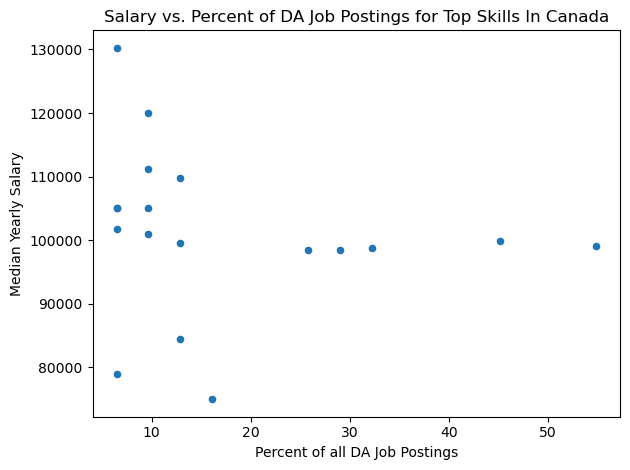

In [26]:
df_CA_skills_in_demend.plot(kind='scatter', x='skill_percent', y='median')
plt.xlabel('Percent of all DA Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Percent of DA Job Postings for Top Skills In Canada')
plt.tight_layout()
plt.show()

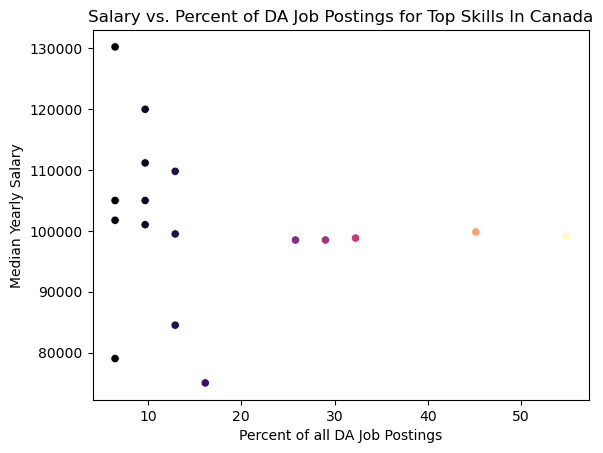

In [45]:
sns.scatterplot(data=df_CA_skills_in_demend, x='skill_percent', y='median', palette='magma', hue='skill_percent')

plt.xlabel('Percent of all DA Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Percent of DA Job Postings for Top Skills In Canada')
plt.legend().remove()




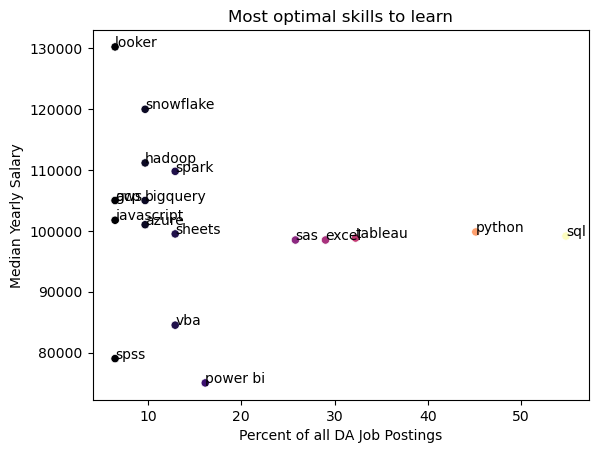

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_CA_skills_in_demend, x='skill_percent', y='median', palette='magma', hue='skill_percent')

plt.xlabel('Percent of all DA Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Most optimal skills to learn')
plt.legend().remove()

# Added using CHATGPT
for i in range(df_CA_skills_in_demend.shape[0]):
    plt.text(df_CA_skills_in_demend['skill_percent'].iloc[i],
             df_CA_skills_in_demend['median'].iloc[i],
             df_CA_skills_in_demend.index[i])  # Assuming the skill names are in the index

plt.show()